In [1]:
import pandas as pd
import numpy as np

In [9]:
batting_df = pd.read_csv("battersW10YRS.csv", index_col=0)
batting_df.replace({'HOF': {'N':0, 'Y': 1}}, inplace=True)
batting_df.head()

,2B,3B,BA,BB,HBP,HOF,HR,IBB,OBP,OPS,SB,SF,SLG,extra_base_hits,firstName,games,hits,lastName,player_id,runs
0,581.00,142.00,0.332587,983.00,32.16,0,97.10,0.27,0.392578,0.837679,276.11,0.27,0.445101,0.0,Adrian Constantine,2523.0,3418.00,Anson,ansonca01,1996.00
1,74.00,17.04,0.254141,65.00,0.10,0,8.06,0.10,0.276421,0.593155,69.05,0.10,0.316735,0.0,Edgar Edward,452.0,537.00,Cuthbert,cuthbne01,453.00
2,85.01,31.05,0.274156,48.00,0.12,0,0.12,0.12,0.287606,0.619684,47.07,0.12,0.332078,0.0,David Daniel,576.0,698.00,Eggler,eggleda01,491.01
3,70.02,30.02,0.260660,42.02,0.10,0,8.08,0.12,0.273193,0.597090,14.09,0.12,0.323898,0.0,Charles John,583.0,636.01,Fulmer,fulmech01,360.01
4,56.02,13.04,0.275695,26.02,0.12,0,0.12,0.12,0.283233,0.592165,65.07,0.12,0.308932,0.0,Michael Henry,547.0,684.00,McGeary,mcgeami01,484.00


In [10]:
target = batting_df['HOF']
target_names = ['negative', 'positive']

In [17]:
d = batting_df.drop('HOF', axis=1)
feature_names = d.columns
data = d[['3B', 'BA','BB', 'HBP', 'HR','IBB','OBP','OPS','SB','SF','SLG','games','hits','extra_base_hits','runs']]
data.head()

,3B,BA,BB,HBP,HR,IBB,OBP,OPS,SB,SF,SLG,games,hits,extra_base_hits,runs
0,142.00,0.332587,983.00,32.16,97.10,0.27,0.392578,0.837679,276.11,0.27,0.445101,2523.0,3418.00,0.0,1996.00
1,17.04,0.254141,65.00,0.10,8.06,0.10,0.276421,0.593155,69.05,0.10,0.316735,452.0,537.00,0.0,453.00
2,31.05,0.274156,48.00,0.12,0.12,0.12,0.287606,0.619684,47.07,0.12,0.332078,576.0,698.00,0.0,491.01
3,30.02,0.260660,42.02,0.10,8.08,0.12,0.273193,0.597090,14.09,0.12,0.323898,583.0,636.01,0.0,360.01
4,13.04,0.275695,26.02,0.12,0.12,0.12,0.283233,0.592165,65.07,0.12,0.308932,547.0,684.00,0.0,484.00


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7913561847988078

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8435171385991058

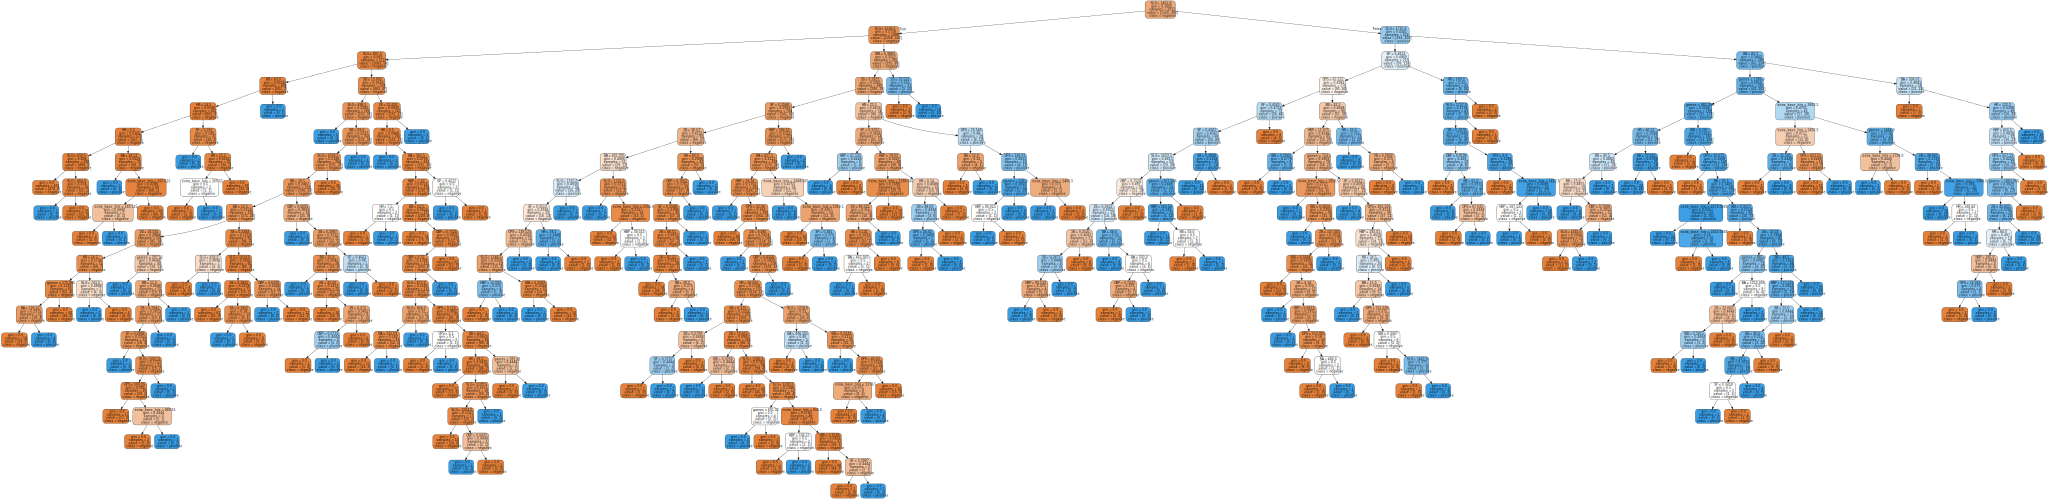

In [21]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 